## Carga de datos

In [1]:
import os
import pandas as pd
from pathlib import Path
ruta_actual = Path.cwd()
PROJECT_DIR = ruta_actual.parents[1]
PROC_DIR     = PROJECT_DIR / 'data' / 'processed'

df=pd.read_csv(PROC_DIR/'dataset.csv')
df.head()

,Unnamed: 0,fecha,estacion,tsm,ano,mes,chla,mes_num,est_index,longitud,latitud,evento,oni
0,0,1981-09-01,est_1,30.5000,NaN,NaN,NaN,NaN,0.0,-109.3,23.8,Neutro,-0.2
1,1,1981-09-01,est_10,28.6250,NaN,NaN,NaN,NaN,9.0,-112.3,27.6,Neutro,-0.2
2,2,1981-09-01,est_11,29.1583,NaN,NaN,NaN,NaN,10.0,-112.6,28.0,Neutro,-0.2
3,3,1981-09-01,est_12,28.8750,NaN,NaN,NaN,NaN,11.0,-112.9,28.5,Neutro,-0.2
4,4,1981-09-01,est_13,26.9667,NaN,NaN,NaN,NaN,12.0,-113.2,28.9,Neutro,-0.2


In [2]:
df.dropna(inplace=True)
df.isna().sum()

Unnamed: 0    0
fecha         0
estacion      0
tsm           0
ano           0
mes           0
chla          0
mes_num       0
est_index     0
longitud      0
latitud       0
evento        0
oni           0
dtype: int64

In [9]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    elif month in [9, 10, 11]:
        return 'Otoño'

df['temporada']=df['mes_num'].apply(get_season)

## TSM promedio por estación

In [4]:
df[['tsm','est_index','mes']].groupby(['est_index','mes']).mean()

tsm
est_index mes                  
0.0       Abril       24.010529
          Agosto      31.013600
          Diciembre   24.224214
          Enero       21.863919
          Febrero     21.479319
...                         ...
16.0      Marzo       18.717414
          Mayo        23.535562
          Noviembre   23.886862
          Octubre     28.021523
          Septiembre  31.155005

[204 rows x 1 columns]

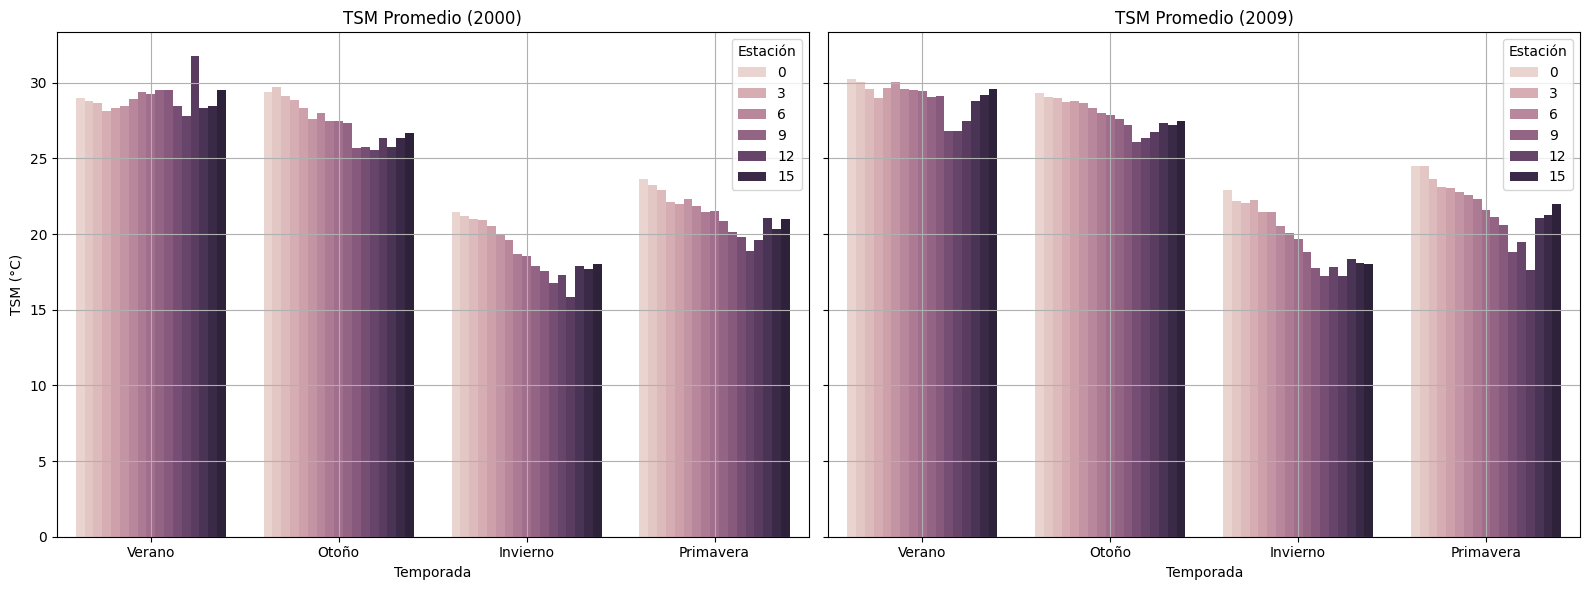

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df[['tsm', 'est_index', 'temporada','ano']].groupby(['est_index', 'temporada','ano']).mean().reset_index()

year1 = 2000
year2 = 2009

# Orden de temporadas
season_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
grouped['temporada'] = pd.Categorical(grouped['temporada'], categories=season_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer año
sns.barplot(data=grouped[grouped['ano'] == year1], x='temporada', y='tsm', hue='est_index', ax=axes[0])
axes[0].set_title(f'TSM Promedio ({year1})')
axes[0].set_xlabel('Temporada')
axes[0].set_ylabel('TSM (°C)')
axes[0].legend(title='Estación')
axes[0].grid(True)

# Segundo año
sns.barplot(data=grouped[grouped['ano'] == year2], x='temporada', y='tsm', hue='est_index', ax=axes[1])
axes[1].set_title(f'TSM Promedio ({year2})')
axes[1].set_xlabel('Temporada')
axes[1].set_ylabel('')
axes[1].legend(title='Estación')
axes[1].grid(True)

plt.tight_layout()
plt.show()

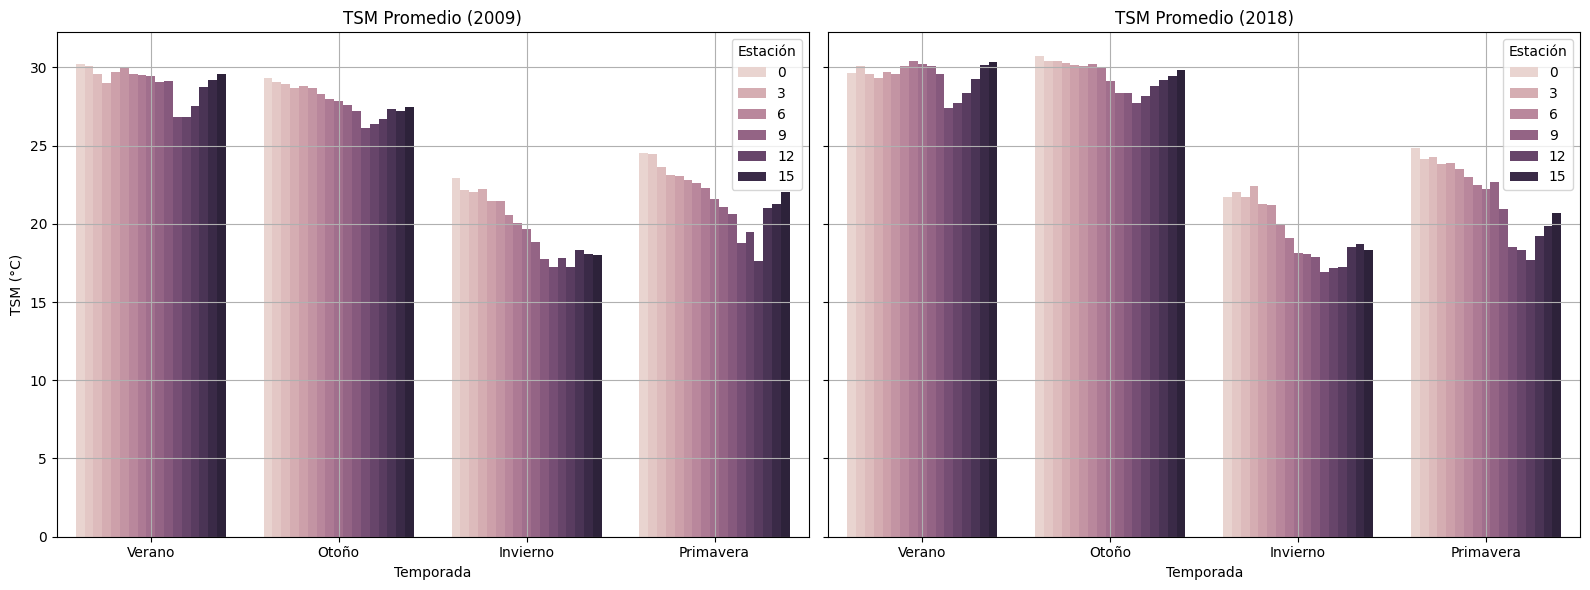

In [34]:
grouped = df[['tsm', 'est_index', 'temporada','ano']].groupby(['est_index', 'temporada','ano']).mean().reset_index()

year1 = 2009
year2 = 2018

# Orden de temporadas
season_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
grouped['temporada'] = pd.Categorical(grouped['temporada'], categories=season_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer año
sns.barplot(data=grouped[grouped['ano'] == year1], x='temporada', y='tsm', hue='est_index', ax=axes[0])
axes[0].set_title(f'TSM Promedio ({year1})')
axes[0].set_xlabel('Temporada')
axes[0].set_ylabel('TSM (°C)')
axes[0].legend(title='Estación')
axes[0].grid(True)

# Segundo año
sns.barplot(data=grouped[grouped['ano'] == year2], x='temporada', y='tsm', hue='est_index', ax=axes[1])
axes[1].set_title(f'TSM Promedio ({year2})')
axes[1].set_xlabel('Temporada')
axes[1].set_ylabel('')
axes[1].legend(title='Estación')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Chl a promedio por estación

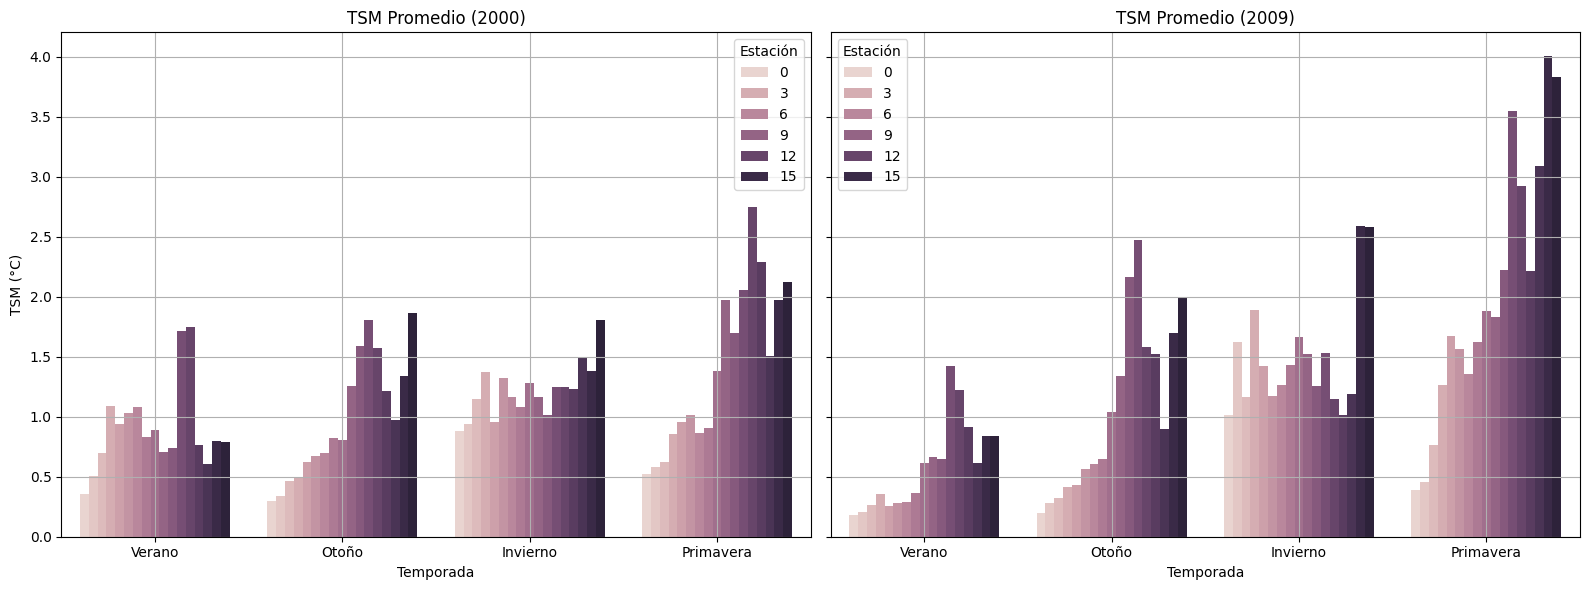

In [32]:
grouped = df[['chla', 'est_index', 'temporada','ano']].groupby(['est_index', 'temporada','ano']).mean().reset_index()

year1 = 2000
year2 = 2009

# Orden de temporadas
season_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
grouped['temporada'] = pd.Categorical(grouped['temporada'], categories=season_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer año
sns.barplot(data=grouped[grouped['ano'] == year1], x='temporada', y='chla', hue='est_index', ax=axes[0])
axes[0].set_title(f'TSM Promedio ({year1})')
axes[0].set_xlabel('Temporada')
axes[0].set_ylabel('TSM (°C)')
axes[0].legend(title='Estación')
axes[0].grid(True)

# Segundo año
sns.barplot(data=grouped[grouped['ano'] == year2], x='temporada', y='chla', hue='est_index', ax=axes[1])
axes[1].set_title(f'TSM Promedio ({year2})')
axes[1].set_xlabel('Temporada')
axes[1].set_ylabel('')
axes[1].legend(title='Estación')
axes[1].grid(True)

plt.tight_layout()
plt.show()

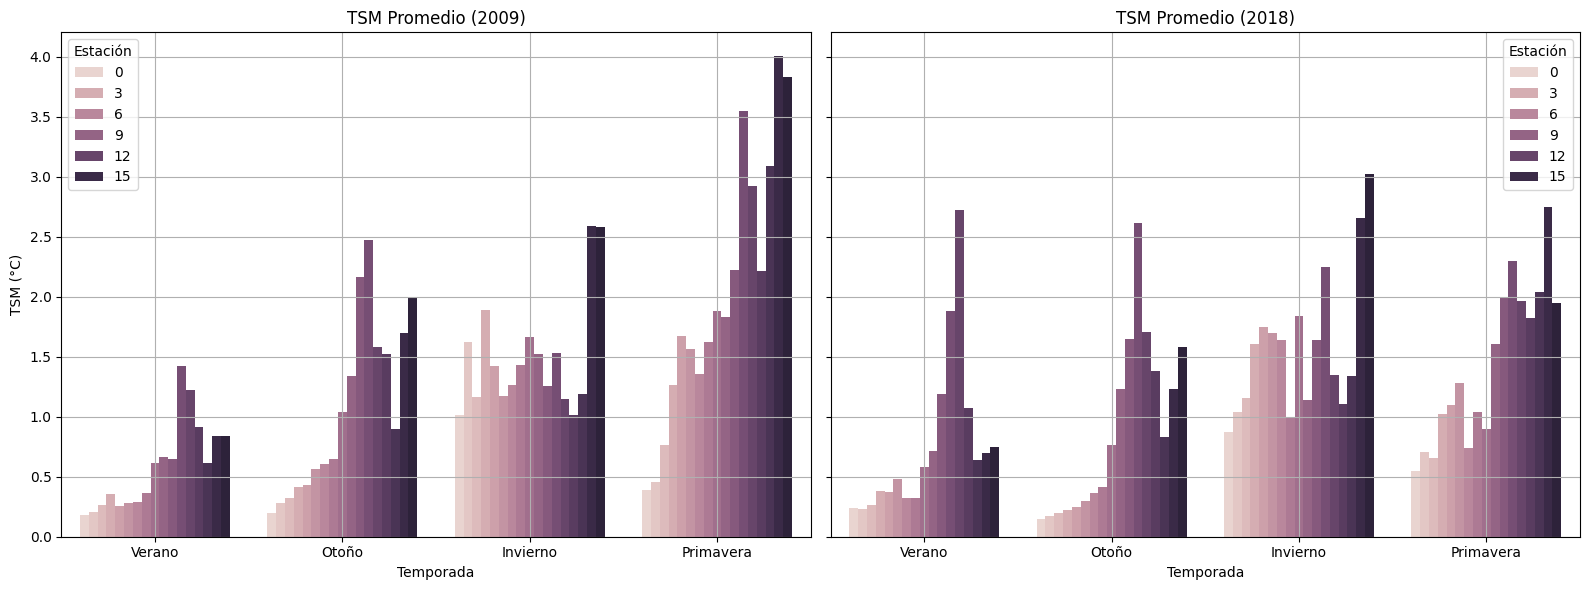

In [31]:
grouped = df[['chla', 'est_index', 'temporada','ano']].groupby(['est_index', 'temporada','ano']).mean().reset_index()

year1 = 2009
year2 = 2018

# Orden de temporadas
season_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
grouped['temporada'] = pd.Categorical(grouped['temporada'], categories=season_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer año
sns.barplot(data=grouped[grouped['ano'] == year1], x='temporada', y='chla', hue='est_index', ax=axes[0])
axes[0].set_title(f'TSM Promedio ({year1})')
axes[0].set_xlabel('Temporada')
axes[0].set_ylabel('TSM (°C)')
axes[0].legend(title='Estación')
axes[0].grid(True)

# Segundo año
sns.barplot(data=grouped[grouped['ano'] == year2], x='temporada', y='chla', hue='est_index', ax=axes[1])
axes[1].set_title(f'TSM Promedio ({year2})')
axes[1].set_xlabel('Temporada')
axes[1].set_ylabel('')
axes[1].legend(title='Estación')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Modelo Logístico

In [38]:
from sklearn.preprocessing import OneHotEncoder

# --- Columnas --- #
category_columns=['ano','mes','mes_num','est_index']
numeric_columns=['oni','tsm','chla']





# Codificar columnas categóricas:
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_categories = encoder.fit_transform(df[category_columns])
encoded_category_columns = encoder.get_feature_names_out(category_columns)



In [42]:
import joblib


feature_names=list(encoded_category_columns)+numeric_columns

model = joblib.load( PROJECT_DIR/'models'/'modelo_logistico.pkl')

coefficients = model.coef_[0]  


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients)
})


importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

importance_df['Normalized_Importance'] = (
    importance_df['Abs_Coefficient'] / importance_df['Abs_Coefficient'].sum()
)

# View top features
importance_df = importance_df.sort_values(by='Normalized_Importance', ascending=False)
print(importance_df[['Feature', 'Normalized_Importance']])


           Feature  Normalized_Importance
18      ano_2016.0               0.087499
20      ano_2018.0               0.073995
3       ano_2001.0               0.069204
5       ano_2003.0               0.068224
19      ano_2017.0               0.063619
..             ...                    ...
58  est_index_16.0               0.000335
52  est_index_10.0               0.000305
48   est_index_6.0               0.000258
53  est_index_11.0               0.000215
49   est_index_7.0               0.000004

[62 rows x 2 columns]


/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_97680/658983451.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(top_n), x='Normalized_Importance', y='Feature', palette='viridis')


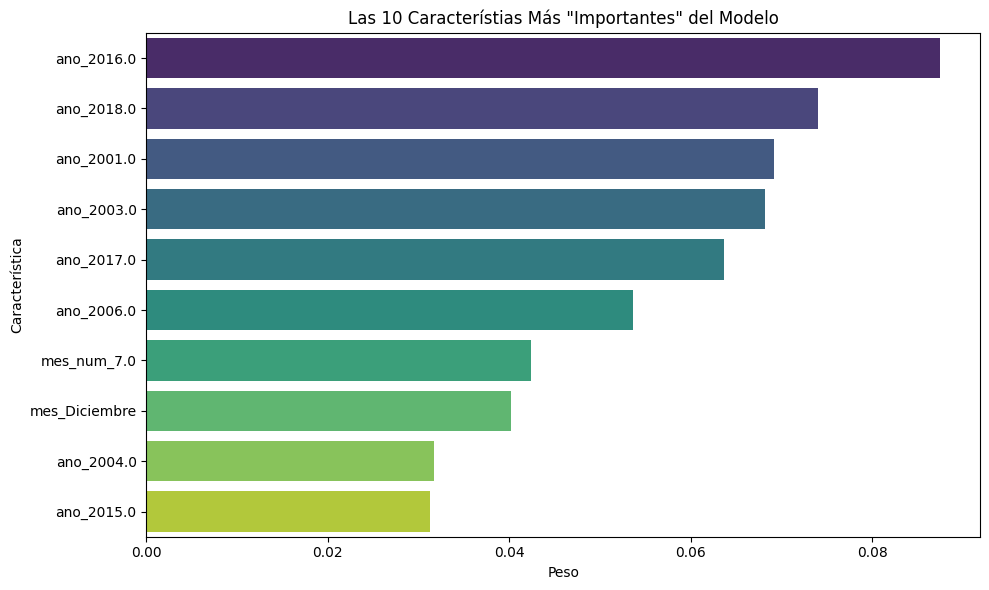

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(top_n), x='Normalized_Importance', y='Feature', palette='viridis')
plt.title(f'Las {top_n} Característias Más "Importantes" del Modelo')
plt.xlabel('Peso')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [45]:
importance_df[importance_df['Feature'].isin(['oni','tsm','chla'])]

,Feature,Coefficient,Abs_Coefficient,Normalized_Importance
60,tsm,-0.089027,0.089027,0.004195
61,chla,0.082566,0.082566,0.003890
59,oni,-0.010441,0.010441,0.000492


In [46]:
df['ano'].value_counts()

ano
2008.0    204
2017.0    204
2015.0    204
2014.0    204
2013.0    204
2012.0    204
2011.0    204
2010.0    204
2009.0    204
1998.0    204
2007.0    204
2006.0    204
2005.0    204
2004.0    204
2003.0    204
2002.0    204
2001.0    204
2000.0    204
1999.0    204
2016.0    204
2018.0    170
1997.0     68
Name: count, dtype: int64